In [1]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy as sp
%matplotlib inline

In [2]:
from digit_viewer import *

In [3]:
df = pd.read_csv('data/train.csv', header = 0)
df_labels = df['label']
df = df.drop('label', axis = 1)

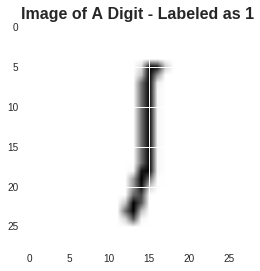

In [4]:
# Print a random row
randrow = np.random.randint(1, len(df) + 1)
img = reshape_image(randrow, df, df_labels)
print_image(img, get_label(randrow, df_labels))

In [6]:
from sklearn.ensemble import RandomForestClassifier


In [174]:
labels = df['label']
df_train = df[[col for col in df.columns if col != 'label']]
X_train = df_train.values
y_train = labels.values

clf = RandomForestClassifier(n_estimators = 200)
clf.fit(X_train, y_train)
preds = clf.predict(X_train)
print(clf.score(X_train, y_train))

1.0


In [175]:
test_df = pd.read_csv('data/test.csv', header = 0)

In [187]:
X_test = test_df.values
test_predictions = clf.predict(X_test)
pred_df = pd.DataFrame(test_predictions, columns = ['Label'])
pred_df['ImageId'] = pred_df.index + 1
pred_df.index = pred_df.ImageId
pred_df.drop('ImageId', inplace = True, axis = 1)

In [188]:
pred_df.head()

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3


In [189]:
pred_df.to_csv('data/output.csv', index = True, header = True)